*****************************************************************
#  The Social Web 
- Instructors: Davide Ceolin, Emma Beauxis-Aussalet.
- TAs: Zubaria Inayat, Maxim Sergeev, Zhuofan Mei, Alexander Schmatz, Ling Jin.
- Exercises for Hands-on session 1
*****************************************************************

Prerequisites:
- Python 3.8
- Python packages: mastodon.py, prettytable, matplotlib, ipython, re

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Mastodon. 

But let's check first if we're running a sufficiently new version of Python:

In [2]:
import platform
import sys
import os
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6)

This jupyter notebook is running on Python 3.10.12


Let's install now the required packages for this hands-on session:


In [59]:
%pip install mastodon.py
%pip install python-dotenv
%pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Part 1: Setting up your Mastodon API in python:

If you do not have an account already.
1. Go to https://joinmastodon.org/ and create a Mastodon account. Unlike Twitter "Mastodon is not a single website. To use it, you need to make an account with a provider — we call them servers — that lets you connect with other people across Mastodon" (from their website). Pick a general one and find a server/instance that suits you on https://instances.social/. 
2. You will receive an Email to confirm your account.
3. Confirm your account.

We will use Mastodon.py in this assignment. It is a Python wrapper of the Mastodon API. This makes it possible to interact with Mastodon servers through Python. For the documentation, check https://mastodonpy.readthedocs.io/en/stable/.
 

Register your app. This only needs to be done once. Uncomment the code and substitute in your information. The outputs are confidential. Delete them before submitting this notebook.

In [4]:
from mastodon import Mastodon
from dotenv import load_dotenv
load_dotenv()

Mastodon.create_app(
    's23-21',
    api_base_url = 'https://mastodon.social', #this is determined by your chosen server, if you picked the general server, dont change this line
    to_file = 'client_credentials.secret'
);


Then, log in. This can be done every time your application starts (e.g. when writing a simple bot), or you can use the persisted information:
(Note that this won’t work when using 2FA - you’ll have to use OAuth, in that case.)

In [5]:
mastodon_username = os.environ.get("MASTODON_USERNAME")
mastodon_password = os.environ.get('MASTODON_PASSWORD')

API = Mastodon(client_id = 'client_credentials.secret',)
API.log_in(
    mastodon_username, #no caps
    mastodon_password,
    to_file = 'user_credentials.secret'
);

### 1.1: Retrieving information about instance (your server)

API.instance() returns a dictionary with a lot of information about your instance.
Look at the dictionary and see what kind of information is being returned?
Can you see how many users populate your server?
How long can Toots (Mastodon tweets) become?

In [62]:
API.instance()

{'uri': 'mastodon.social',
 'title': 'Mastodon',
 'short_description': 'The original server operated by the Mastodon gGmbH non-profit',
 'description': '',
 'email': 'staff@mastodon.social',
 'version': '4.2.1+pr-27634-22407c7',
 'urls': {'streaming_api': 'wss://streaming.mastodon.social'},
 'stats': {'user_count': 1676266,
  'status_count': 73120076,
  'domain_count': 64831},
 'thumbnail': 'https://files.mastodon.social/site_uploads/files/000/000/001/@1x/57c12f441d083cde.png',
 'languages': ['en'],
 'registrations': True,
 'approval_required': False,
 'invites_enabled': True,
 'configuration': {'accounts': {'max_featured_tags': 10},
  'statuses': {'max_characters': 500,
   'max_media_attachments': 4,
   'characters_reserved_per_url': 23},
  'media_attachments': {'supported_mime_types': ['image/jpeg',
    'image/png',
    'image/gif',
    'image/heic',
    'image/heif',
    'image/webp',
    'image/avif',
    'video/webm',
    'video/mp4',
    'video/quicktime',
    'video/ogg',
    'a

You can also retrieve dictionaries containing information about trending hashtags or trending statuses (toots).
Below you can see code to print the currently most trending status.
Check the documentation on how to get the trending hashtags.

In [63]:
from IPython.display import HTML #for formatting HTML script
HTML(API.trending_statuses()[0]["content"])

### Task 1 
Write code that prints out the first 3 trending hashtags.

In [64]:
import pandas as pd
df = pd.DataFrame(API.trending_tags(limit=3))
df.head()

,name,url,history,following
0,breakfastasong,https://mastodon.social/tags/breakfastasong,"[{'day': 2023-11-06 00:00:00+00:00, 'accounts'...",False
1,silentsunday,https://mastodon.social/tags/silentsunday,"[{'day': 2023-11-06 00:00:00+00:00, 'accounts'...",False
2,Fotomontag,https://mastodon.social/tags/Fotomontag,"[{'day': 2023-11-06 00:00:00+00:00, 'accounts'...",False


### 1.2: Retrieving recent Toots

In [65]:
from IPython.display import HTML #via the api we get raw html scripts, so  use this function to format it nicely

q = "#tbt"
search_results = API.search_v2(q)
def printSearch(results, limit=10):
    for n in range(limit):
        print(f"Toot {n+1}\n\n")
        html = results["statuses"][n]["content"]
        display(HTML(html))
        print("_"*100)

### Task 2

In the cell below, create a second variable (e.g. `search_results2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [66]:
query = "#runescape"
search_results2= API.search_v2(query)
printSearch(search_results2, limit=3)

Toot 1




____________________________________________________________________________________________________
Toot 2




____________________________________________________________________________________________________
Toot 3




____________________________________________________________________________________________________


## Part 2: Extracting text, screen names, and hashtags from tweets 

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples from Mining the Social Web:

In [67]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]

# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]

# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\n', 'Web\n')]

# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]

# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x for y in list_of_lists for x in y]

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `toots` of type list. \
The list will be filled with the `content` elements from each `toot`, whereas `toot` comes from looping through all `statuses` in the `search_results` dict. \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [68]:
ids = [ toot["id"] for toot in \
       search_results["statuses"] ]

# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.

toots = [ toot['content'] for toot in search_results["statuses"] ]

# Compute a collection of all words from all tweets
words = [ w for t in toots for w in t.split() ]

import json
print(json.dumps(toots, indent=1))
print(json.dumps(words, indent=1))

[
 "<p>Victory \u270c\ufe0f for Ukraine \ud83d\udcaa\ud83c\uddfa\ud83c\udde6 will come from the sky \ud83c\udf0c and longe range munitions on Russian logistics \ud83d\ude08 </p><p>Repost from @cabogunderson<br>\u2022<br><a href=\"https://mstdn.social/tags/tbt\" class=\"mention hashtag\" rel=\"nofollow noopener noreferrer\" target=\"_blank\">#<span>tbt</span></a> - one of the best places in the world to fly</p><p><a href=\"https://mstdn.social/tags/raptornation\" class=\"mention hashtag\" rel=\"nofollow noopener noreferrer\" target=\"_blank\">#<span>raptornation</span></a> <br>@jber3wg <br>@jber_official <br>@arcticthunderak <br>@usairforce<br><a href=\"https://mstdn.social/tags/f22\" class=\"mention hashtag\" rel=\"nofollow noopener noreferrer\" target=\"_blank\">#<span>f22</span></a> of Justice \u2694\ufe0f</p>",
 "<p><a href=\"https://mstdn.ca/tags/ThrowbackThursday\" class=\"mention hashtag\" rel=\"nofollow noopener noreferrer\" target=\"_blank\">#<span>ThrowbackThursday</span></a> 

What happened here?
When extracting the toots from your instance, they are in HTML format. While these markers may be valuable for certain types of analysis, they may not be necessary for text-based analysis alone. Remove the HTML-tags by applying the follwowing function to make it more readable.

In [69]:
import re

def strip_html_tags(html_text):
    plain_text = re.sub(r'<.*?>', '', html_text)
    return plain_text

toots = [ strip_html_tags(toot['content']) for toot in search_results["statuses"] ]

# Compute a collection of all words from all tweets
words = [ w for t in toots for w in t.split() ]

import json
print(json.dumps(toots, indent=1))
print(json.dumps(words, indent=1))

[
 "Victory \u270c\ufe0f for Ukraine \ud83d\udcaa\ud83c\uddfa\ud83c\udde6 will come from the sky \ud83c\udf0c and longe range munitions on Russian logistics \ud83d\ude08 Repost from @cabogunderson\u2022#tbt - one of the best places in the world to fly#raptornation @jber3wg @jber_official @arcticthunderak @usairforce#f22 of Justice \u2694\ufe0f",
 "#ThrowbackThursday Halloween edition. My 2007 BSG costume, which I still have (though it doesn't fit nearly as well now...) #tbt",
 "10 years ago today I asked my friends on FB about pictures I&#39;d taken that would be worth printing and hanging up in my office because patients (I&#39;m admin staff not an MD) kept coming into my office and getting uncomfortable b/c it was so impersonal. Folks liked the landscapes but conceded it didn&#39;t improve the serial killer vibe. I also threw in a few photos of friends.#TBT #ThrowbackThursday #Photo",
 "Together Forever, circa 2010https://www.agent-x.com.au/tag/rick-roll/#ThrowbackThursday #tbt #funn

### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [70]:
usernames = [ toot["account"]["username"] for toot in search_results2["statuses"] ]
hashtags = [tag["name"] for toot in search_results2["statuses"] for tag in toot["tags"]]
_toots = [strip_html_tags(toot["content"]) for toot in search_results2["statuses"]]
text = [w for t in _toots for w in t.split() ]
print(text)
print(hashtags)

["I'm", '100%', 'on', 'a', 'RuneScape', 'arc', 'at', 'the', 'moment.', 'Questing', 'here', 'there', 'and', 'everywhere.', "Don't", 'be', 'shocked', 'if', 'it', 'takes', 'up', 'a', 'slot', 'on', 'my', 'streams', 'for', 'a', 'little', 'bit.', 'Even', 'considering', 'starting', 'ah', 'Ironman', 'challenge', 'at', 'some', 'point', 'tbh#RuneScape', '#twitch', '#streaming', '#ironman', '#ironmanchallenge', 'Playing', 'RuneScape', 'tonight', 'with', 'the', 'Mr', 'and', 'I', 'suddenly', 'realised', 'we', 'were', 'having', 'our', 'own', 'lil', 'LAN', 'party', '🥰', 'we', 'even', 'had', 'snacks!', '10/10', 'Saturday', 'night.', '❤️#lan', '#lanparty', '#runescape', '#OSRS', '#snacks', '#saturdayvibes', 'So', 'hey,', 'I', 'play', 'osrs', 'and', 'play', 'ironman', 'mode', '(btw)', 'and', 'when', 'I', 'first', 'started', 'there', 'was', 'a', 'lot', 'of', 'downtime', 'while', 'I', 'afk', 'trained', 'magic', 'via', 'splashing,', 'or', 'ranged', 'via', 'safespotting,', 'especially', 'during', 'early', '

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [71]:
from collections import Counter

for item in [words]:
    c = Counter(item)
    
print(c.most_common()[:10]) # top 10

[('the', 20), ('to', 14), ('a', 14), ('in', 12), ('of', 9), ('I', 8), ('#tbt', 8), ('my', 8), ('and', 7), ('#ThrowbackThursday', 7)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [72]:
for item in [hashtags]:
    c = Counter(item)
    
print(c.most_common()[:10]) 

[('runescape', 19), ('osrs', 8), ('twitch', 1), ('streaming', 1), ('ironman', 1), ('ironmanchallenge', 1), ('lan', 1), ('lanparty', 1), ('snacks', 1), ('saturdayvibes', 1)]


### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [73]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(hashtags, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [74]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['runescape', 'twitch', 'streaming', 'ironman', 'ironmanchallenge', 'lan', 'lanparty', 'runescape', 'osrs', 'snacks', 'saturdayvibes', 'sketch', 'doodle', 'osrs', 'oldschoolrunescape', 'old_school_runescape', 'skunk', 'comic', 'runescape', 'runescape', 'smite', 'runescape', 'osrs', 'futuregamereleases', 'halloween', 'runescape', 'runescape', 'runescape', 'osrs', 'runescape', 'runescape', 'runescape', 'osrs', 'runescape', 'runescape', 'osrs', 'jagex', 'runescape', 'runescape', 'runescape', 'osrs', 'oldschoolrs', 'osrs', 'runescape', 'oldschool', 'runescape', 'runescape', 'ttrpg', 'boardgames', 'steamforged']


### 3.2 Using prettytable to display tuples in a nice way



In [75]:
from prettytable import PrettyTable


pt = PrettyTable(field_names=['Words', 'Count'])
c = Counter(hashtags)
[ pt.add_row(kv) for kv in c.most_common()[:10] ]
pt.align["Words"], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt) 

+------------------+-------+
| Words            | Count |
+------------------+-------+
| runescape        |    19 |
| osrs             |     8 |
| twitch           |     1 |
| streaming        |     1 |
| ironman          |     1 |
| ironmanchallenge |     1 |
| lan              |     1 |
| lanparty         |     1 |
| snacks           |     1 |
| saturdayvibes    |     1 |
+------------------+-------+


### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [76]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses) 

# Let's use these functions:
print(lexical_diversity(words))
print(average_words(toots))

0.5
30.65


## Task 5: What do the printed numbers indicate? Try to explain them.

### Lexical Diversity
Lexical diversity is a counting unique words in a text. The higher the lexical diversity, the more unique words are in the text.
The function creates a count of a set (only unique values) and an array of the words, then divides the unique word count by the total word count to find the percentage of unqiue words of the total words.

### Average words
Average words simply divides the total amount of words by the amount of toots to get an average.

### 3.4 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [77]:
retooter = [user["username"] for user in API.status_reblogged_by(111222929039002402)] #might need to insert a different toot id if on different server
print("Users who've reblogged the toot:\n")
print(retooter)

Users who've reblogged the toot:

['RacerX', 'Spoon', 'anoldguy', 'wj', 'reallychris', 'betsythemuffin', 'ianmnoone', 'purinkle', 'numbercrow', 'sentient_water', 'eiscomics', 'zed', 'gaelicWizard', 'onepict', 'gilesc', 'lamejoan', 'JosephLeedy', 'harun', 'queerbeat', 'fedwards9965', 'Billybobbell', 'fmarini', 'ehren', 'Ceejaybeau', 'SamUpstate', 'franoreilly', 'danielholt', 'Strider', 'mybarkingdogs', 'TomSwirly', 'charllthomas', 'harrybo93', 'Tom_ofB', 'strangetikigod', 'Prototype9215', 'ponyponypony', 'JimmyB', 'bigTanuki', 'anathema_device', 'grinningcat']


### Task 6 (advanced)

If you have a Toot account with a nontrivial number of tweets you can do some analysis of your own account.
Check the documentation on how to access your toots.



What are the most common terms that appear in your toot? \
Which toot was replied the most?\
How many of your toots are retweeted (and why do you think this is the case)?

In [78]:
#Your Code

In [79]:

"""possible solution"""
my_id = API.me()["id"]
my_statuses = API.account_statuses(my_id)
my_toots = [ strip_html_tags(status["content"]) for status in my_statuses]
my_words = [ w for t in my_toots for w in t.split() ]
print("Top 10 terms")
for item in [my_words]:
    c = Counter(item)
print(c.most_common()[:10]) # top 10

toot_most_rep = None
replies = -1
toot_dicts = [status for status in my_statuses]
for toot_dict in toot_dicts:
    if toot_dict["replies_count"] > replies:
        toot_most_rep = toot_dict["content"]
print("most replied to:")
display(HTML(toot_most_rep))

count_retweeted = 0
for toot_dict in toot_dicts:
    if toot_dict["reblogged"]:
        count_retweeted +=1
print("reblogged toots: ",count_retweeted)

Top 10 terms
[]
most replied to:


<IPython.core.display.HTML object>

reblogged toots:  0


### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*

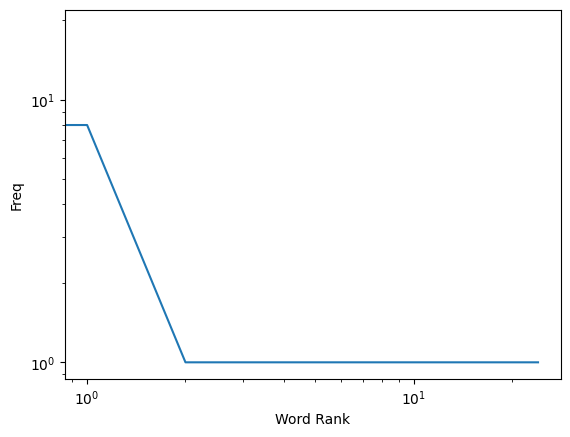

In [80]:
word_counts = sorted(Counter(hashtags).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

<Figure size 640x480 with 0 Axes>

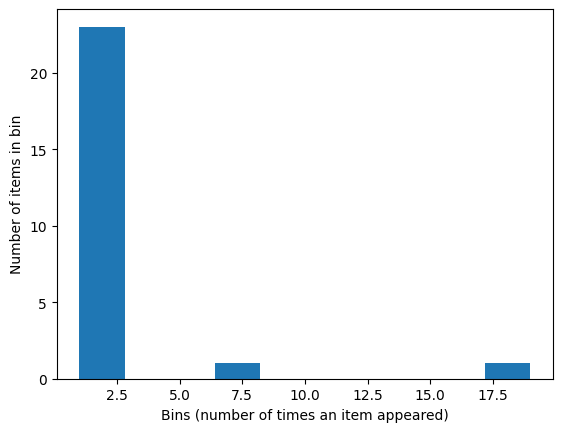

<Figure size 640x480 with 0 Axes>

In [81]:
c = Counter(hashtags)
plt.hist(c.values())
    
plt.title("")
plt.ylabel("Number of items in bin")
plt.xlabel("Bins (number of times an item appeared)")
    
plt.figure()


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/cb/n9d5t98934j3vf322bsdhtb80000gn/T/ipykernel_59469/1574109043.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_counts, kde=False, rug=True)


<Axes: >

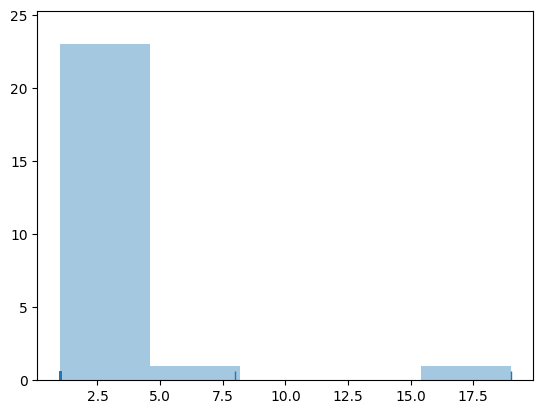

In [82]:
# extra: seaborn plots with a one-liner.
%pip install seaborn
import seaborn as sns

sns.distplot(word_counts, kde=False, rug=True)
